In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

import warnings

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
sns.despine()
sns.set_palette('viridis')

/kaggle/input/mlp-term-2-2025-kaggle-assignment-1/sample_submission.csv
/kaggle/input/mlp-term-2-2025-kaggle-assignment-1/train.csv
/kaggle/input/mlp-term-2-2025-kaggle-assignment-1/test.csv


<Figure size 640x480 with 0 Axes>

# Loading the Data

In [2]:
train = pd.read_csv("/kaggle/input/mlp-term-2-2025-kaggle-assignment-1/train.csv", index_col = "id")
test = pd.read_csv("/kaggle/input/mlp-term-2-2025-kaggle-assignment-1/test.csv", index_col = "id")
train.head()

,airline,flight,source,departure,stops,arrival,destination,class,duration,days_left,price
id,,,,,,,,,,,
0,Vistara,UK-930,Mumbai,Early_Morning,one,Night,Chennai,Business,NaN,40.0,64173
1,Air_India,AI-539,Chennai,Evening,one,Morning,Mumbai,Economy,16.08,26.0,4357
2,SpiceJet,SG-8107,Delhi,Early_Morning,zero,Morning,Chennai,Economy,2.92,25.0,3251
3,NaN,0.00E+00,Hyderabad,Early_Morning,zero,Morning,Bangalore,Economy,1.50,22.0,1776
4,Air_India,AI-569,Chennai,Early_Morning,one,Morning,Bangalore,Economy,4.83,20.0,3584


In [3]:
test.head()

,airline,flight,source,departure,stops,arrival,destination,class,duration,days_left
id,,,,,,,,,,
0,Vistara,UK-816,Bangalore,Morning,zero,Afternoon,Delhi,Economy,2.67,18.0
1,Air_India,AI-440,Chennai,Early_Morning,zero,Morning,Delhi,Economy,NaN,5.0
2,SpiceJet,SG-8938,Delhi,Evening,one,Evening,Bangalore,Economy,NaN,44.0
3,Vistara,UK-838,Chennai,Night,one,Evening,Kolkata,Business,21.00,26.0
4,Air_India,AI-429,Delhi,Morning,one,Evening,Mumbai,Business,7.25,22.0


## Learning about the data 

In [4]:
print("The shape of the data are:\n","for train:\n", train.shape,"\n")
print("for test:\n", test.shape)
print("The dimentions are:\n","for train:\n", train.ndim,"\n")
print("for train:\n", test.ndim)
print("The indexes are:\n","for train:\n", train.index,"\n")
print("for train:\n", test.index)

The shape of the data are:
 for train:
 (40000, 11) 

for test:
 (10000, 10)
The dimentions are:
 for train:
 2 

for train:
 2
The indexes are:
 for train:
 Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       39990, 39991, 39992, 39993, 39994, 39995, 39996, 39997, 39998, 39999],
      dtype='int64', name='id', length=40000) 

for train:
 Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       9990, 9991, 9992, 9993, 9994, 9995, 9996, 9997, 9998, 9999],
      dtype='int64', name='id', length=10000)


# 1. Identify data types of different columns (5)
The data types of the different columns are identified and explicitly stated in the notebook


In [5]:
print("for train:\n", train.info(), "\n")
print("for test:\n", test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 0 to 39999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   airline      35387 non-null  object 
 1   flight       40000 non-null  object 
 2   source       40000 non-null  object 
 3   departure    35208 non-null  object 
 4   stops        37681 non-null  object 
 5   arrival      40000 non-null  object 
 6   destination  40000 non-null  object 
 7   class        40000 non-null  object 
 8   duration     36987 non-null  float64
 9   days_left    35562 non-null  float64
 10  price        40000 non-null  int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 3.7+ MB
for train:
 None 

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   airline      9452 non-null   object 
 1   flight       10000 non-null  object

In [6]:
print("Data types of all the columns are:/n")
print("for train:\n", train.dtypes, "\n")
print("for test:\n", test.dtypes)

Data types of all the columns are:/n
for train:
 airline         object
flight          object
source          object
departure       object
stops           object
arrival         object
destination     object
class           object
duration       float64
days_left      float64
price            int64
dtype: object 

for test:
 airline         object
flight          object
source          object
departure       object
stops           object
arrival         object
destination     object
class           object
duration       float64
days_left      float64
dtype: object


To begin, I loaded the datasets and used `.info()` and `.dtypes` to inspect the data types. This helped me distinguish between numerical and categorical columns. For example, `duration`, `days_left`, and `price` are numerical, while columns like `airline`, `source`, and `class` are categorical. Understanding the data types was essential for deciding on appropriate preprocessing methods, such as encoding and scaling. It also helped me plan how to deal with missing values and outliers later. This foundational step allowed me to build the rest of my pipeline in a more structured way.

# 2. Present descriptive statistics of numerical columns (5)
Details such as min value, max value, mean and median for each numerical column is presented

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,36987.0,12.004088,7.108063,0.83,6.67,11.08,15.92,47.08
days_left,35562.0,26.197936,13.469232,1.00,15.00,26.00,38.00,49.00
price,40000.0,20801.490250,22729.148420,1105.00,4687.00,7353.00,42521.00,114704.00


In [8]:
print("The min values are:\n", train[["duration", "days_left", "price"]].min(), "\n")
print("The max values are:\n", train[["duration", "days_left", "price"]].max(), "\n")
print("The mean values are:\n", train[["duration", "days_left", "price"]].mean(), "\n")
print("The median values are:\n", train[["duration", "days_left", "price"]].median())

The min values are:
 duration        0.83
days_left       1.00
price        1105.00
dtype: float64 

The max values are:
 duration         47.08
days_left        49.00
price        114704.00
dtype: float64 

The mean values are:
 duration        12.004088
days_left       26.197936
price        20801.490250
dtype: float64 

The median values are:
 duration       11.08
days_left      26.00
price        7353.00
dtype: float64


In [9]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,9418.0,12.005125,7.086652,0.92,6.67,11.17,15.92,40.42
days_left,9304.0,26.163156,13.453717,1.00,15.00,26.00,38.00,49.00


In [10]:
print("The min values are:\n", test[["duration", "days_left"]].min(), "\n")
print("The max values are:\n", test[["duration", "days_left"]].max(), "\n")
print("The mean values are:\n", test[["duration", "days_left",]].mean(), "\n")
print("The median values are:\n", test[["duration", "days_left"]].median())

The min values are:
 duration     0.92
days_left    1.00
dtype: float64 

The max values are:
 duration     40.42
days_left    49.00
dtype: float64 

The mean values are:
 duration     12.005125
days_left    26.163156
dtype: float64 

The median values are:
 duration     11.17
days_left    26.00
dtype: float64


I used `.describe().T` along with functions like `.min()`, `.max()`,` .mean()`, and `.median()` to explore the central tendency and spread of numerical features. I did this for both the training and test datasets, focusing particularly on `duration`, `days_left`, and `price`. These statistics helped me identify irregularities, such as unusually high durations or prices, and guided my approach to handle outliers. Presenting these descriptive statistics gave me a solid understanding of the distribution and variability of important features in the dataset.

# 3. Identify and handle the missing values (10)
Missing values are identified and are dropped or imputed

In [11]:
train_copy = train.copy(deep = True)
test_copy = test.copy(deep = True)
for i in (train_copy, test_copy):
    i.replace(to_replace=r'^\d+\.\d+[eE][+-]?\d+$', value=np.nan, regex=True, inplace=True)
print("for train:\n", train_copy.isna().sum(), "\n")
print("for test:\n", test_copy.isna().sum())

for train:
 airline        4613
flight         5922
source            0
departure      4792
stops          2319
arrival           0
destination       0
class             0
duration       3013
days_left      4438
price             0
dtype: int64 

for test:
 airline         548
flight         1474
source            0
departure       920
stops           651
arrival           0
destination       0
class             0
duration        582
days_left       696
dtype: int64


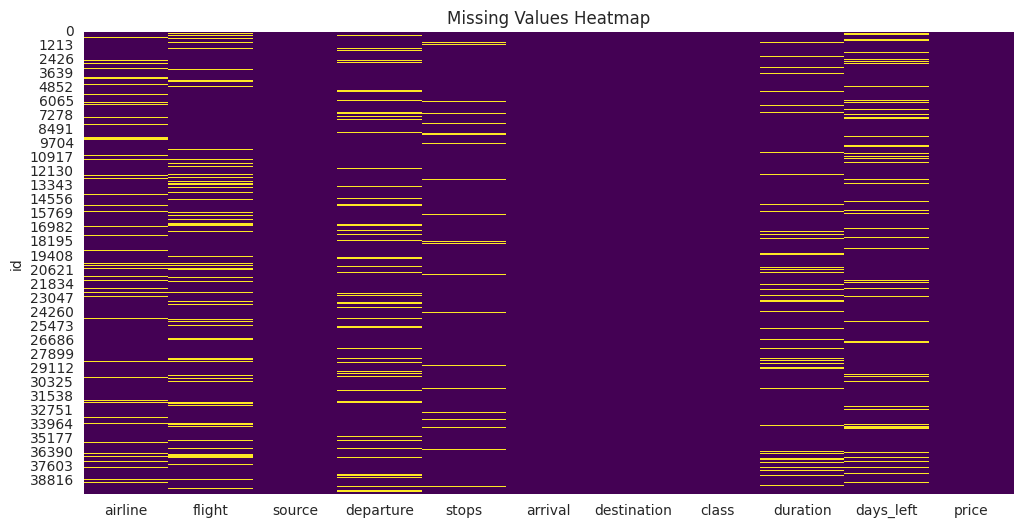

In [12]:
plt.figure(figsize=(12, 6))
sns.heatmap(train_copy.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

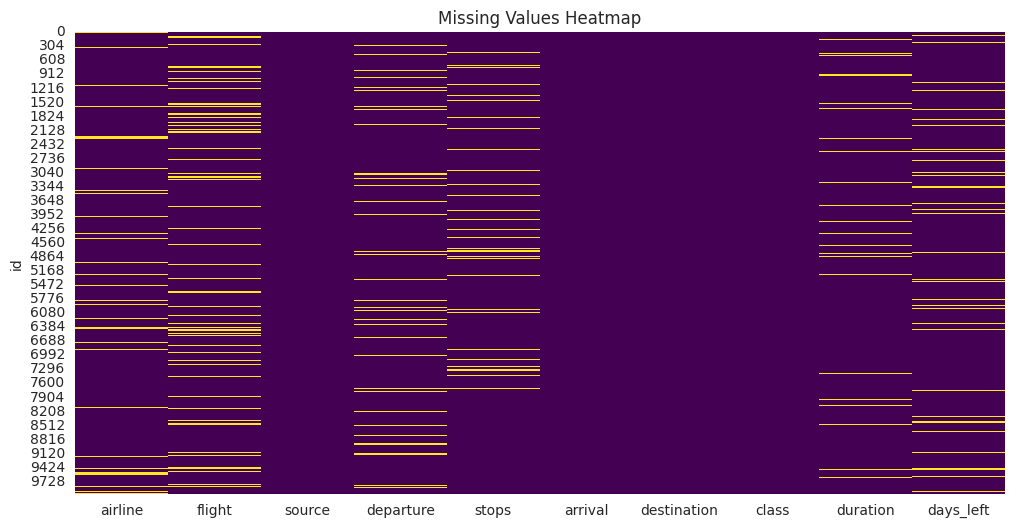

In [13]:
plt.figure(figsize=(12, 6))
sns.heatmap(test_copy.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [14]:
for i in (train_copy, test_copy):
    for col in i.columns:
        if i[col].dtype == 'object':
            i[col].fillna("(unknown)", inplace=True)
        else:
            i[col].fillna(i[col].median(), inplace=True)

In [15]:
print("for train\n", train_copy.isna().sum())
print("\n for test\n", test_copy.isna().sum())

for train
 airline        0
flight         0
source         0
departure      0
stops          0
arrival        0
destination    0
class          0
duration       0
days_left      0
price          0
dtype: int64

 for test
 airline        0
flight         0
source         0
departure      0
stops          0
arrival        0
destination    0
class          0
duration       0
days_left      0
dtype: int64


To check for missing values, I used `.isna().sum()` and visualized them using a heatmap. I also replaced scientific notation strings with NaN using a regex, which helped catch hidden missing values. For categorical columns, I filled missing values with placeholders like "(unknown)". For numerical features, I used median imputation to avoid skewing the data. This way, I ensured the dataset was clean without introducing bias. Handling missing values early helped stabilize model performance and improved data quality for the next steps.

# 4. Identify and handle duplicates (10)
Duplicates are identified and are dropped if they exist

In [16]:
print("for train",train_copy.duplicated().sum())

for train 360


In [17]:
train_copy.drop_duplicates(inplace = True)
print("for train",train_copy.duplicated().sum())

for train 0


In [18]:
print("The remaining rows that are left: ")
print("for train", train_copy.shape[0])

The remaining rows that are left: 
for train 39640


I identified duplicate records using `.duplicated().sum()` and removed them using `.drop_duplicates()`. I verified the changes by checking the number of rows before and after the operation. This was important because duplicate entries can distort model training, especially in regression tasks. Cleaning them ensured my dataset was unique and reliable. By confirming the shape of the dataset post-cleaning, I was confident that this step improved data integrity and model robustness.

# 5. Identify and handle outliers (10)
Outliers are identified and explanation for retaining / dropping is provided

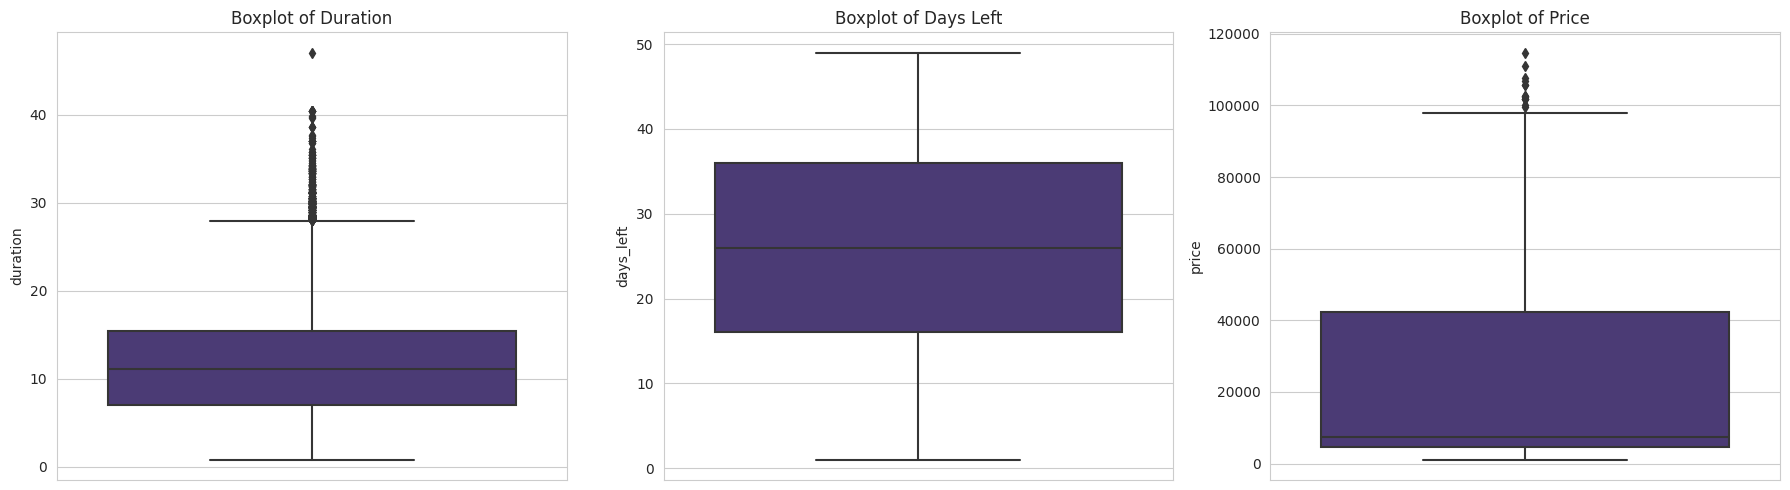

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(ax=axes[0], data=train_copy, y="duration")
axes[0].set_title("Boxplot of Duration")
sns.boxplot(ax=axes[1], data=train_copy, y="days_left")
axes[1].set_title("Boxplot of Days Left")
sns.boxplot(ax=axes[2], data=train_copy, y="price")
axes[2].set_title("Boxplot of Price")
plt.tight_layout()
plt.show()

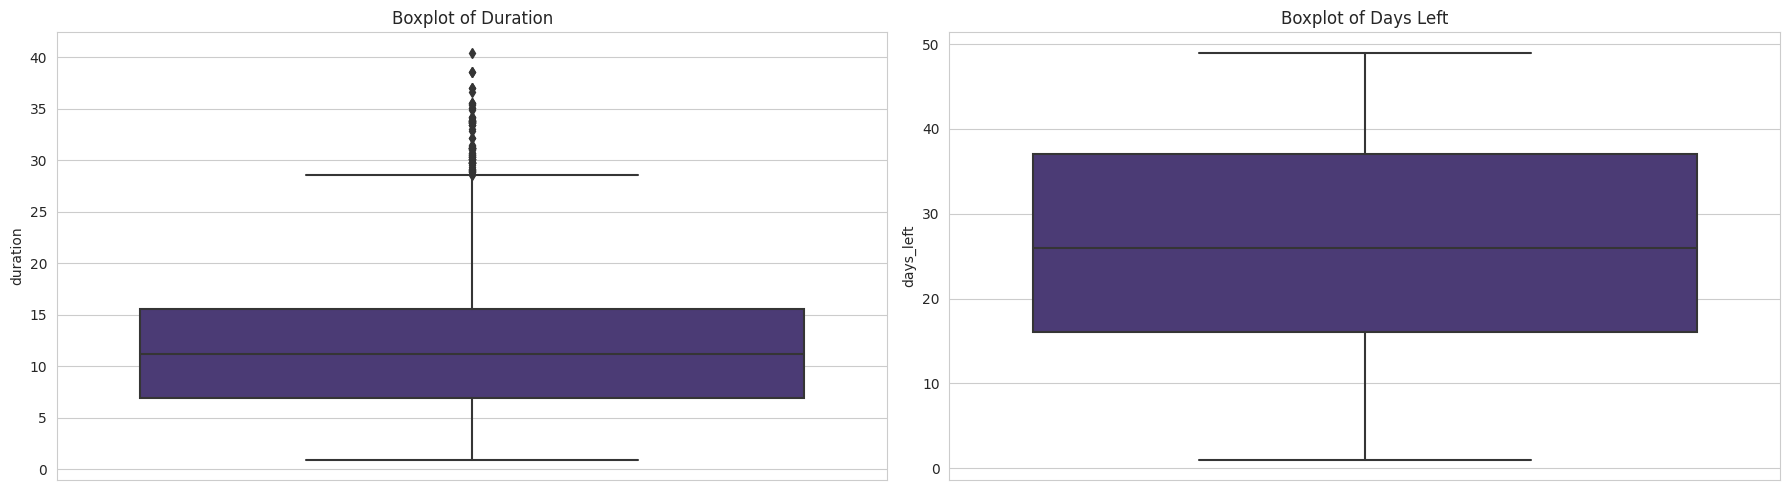

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
sns.boxplot(ax=axes[0], data=test_copy, y="duration")
axes[0].set_title("Boxplot of Duration")
sns.boxplot(ax=axes[1], data=test_copy, y="days_left")
axes[1].set_title("Boxplot of Days Left")
plt.tight_layout()
plt.show()

In [21]:
for i in (train_copy, test_copy):
    for col in i.columns:
        if i[col].dtype != 'object':
            Q1 = i[col].quantile(0.25)
            Q3 = i[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5*IQR
            upper_bound = Q3 + 1.5*IQR
            i[col].clip(lower=lower_bound, upper=upper_bound, inplace=True)

To identify outliers, I used boxplots for `duration`, `days_lef`t, and `price`. Then, I applied the IQR (Interquartile Range) method to clip outliers beyond 1.5 times the IQR. I repeated this for both the training and test datasets. Rather than dropping extreme values, I chose to cap them to preserve data while reducing their influence. This method helped me keep the dataset intact and stable for model training. It was an effective balance between cleaning and retaining valuable information.

# 6. Present at least three visualizations and provide insights for the same (10)
At least three visualizations on the data is presented

## 1. Average Flight Price by Airline 

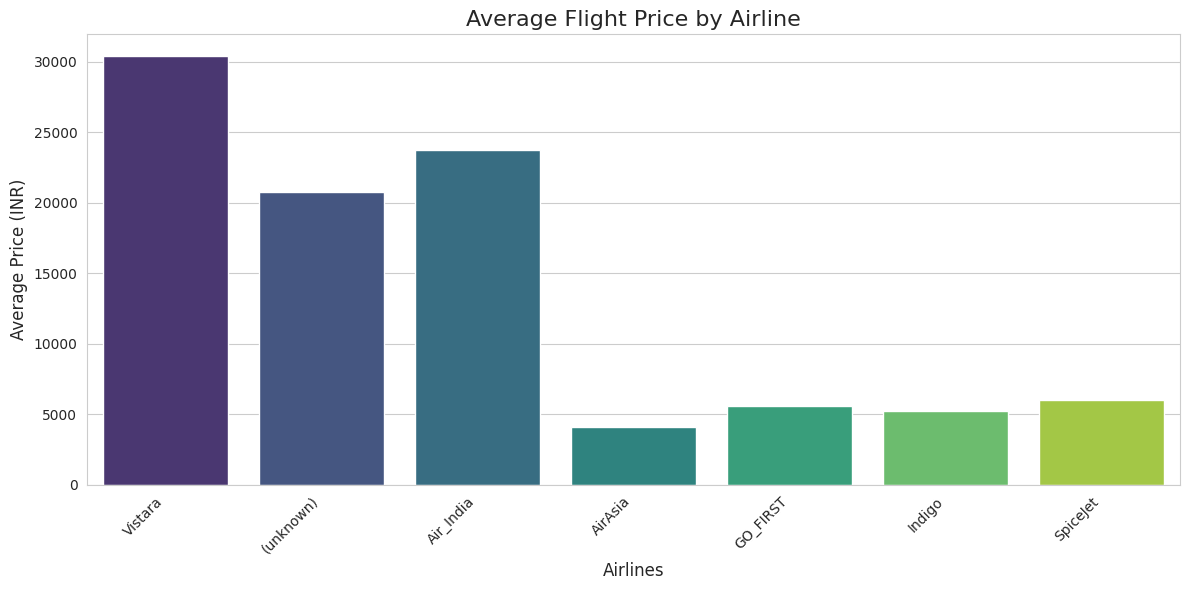

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(data=train_copy.sort_values(by='price', ascending=False), x="airline", y="price", estimator=np.mean, errorbar=None, palette='viridis')
plt.title("Average Flight Price by Airline", fontsize=16)
plt.ylabel("Average Price (INR)", fontsize=12)
plt.xlabel("Airlines", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 2. Price vs Duration Colored by Class

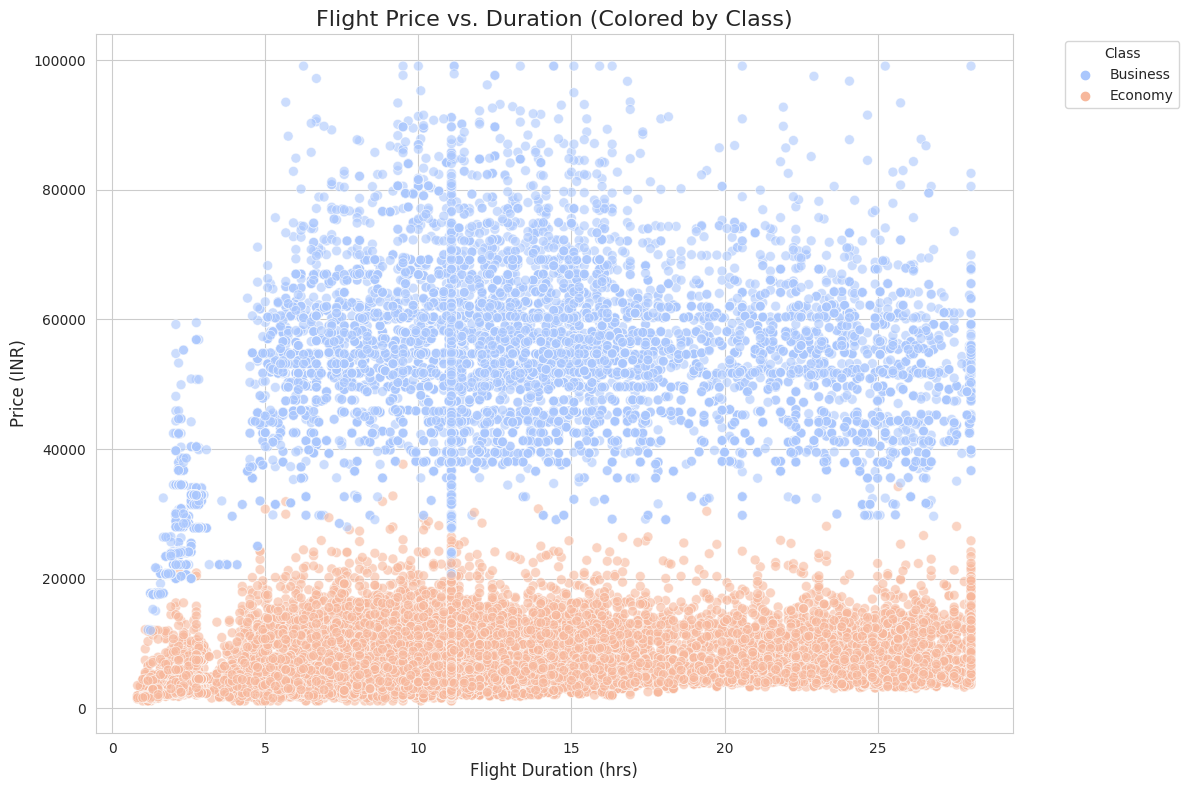

In [23]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=train_copy, x="duration", y="price", hue="class", alpha=0.6, s=50, palette='coolwarm')
plt.title("Flight Price vs. Duration (Colored by Class)", fontsize=16)
plt.xlabel("Flight Duration (hrs)", fontsize=12)
plt.ylabel("Price (INR)", fontsize=12)
plt.legend(title="Class", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 3. Flight Count by Stops and Class

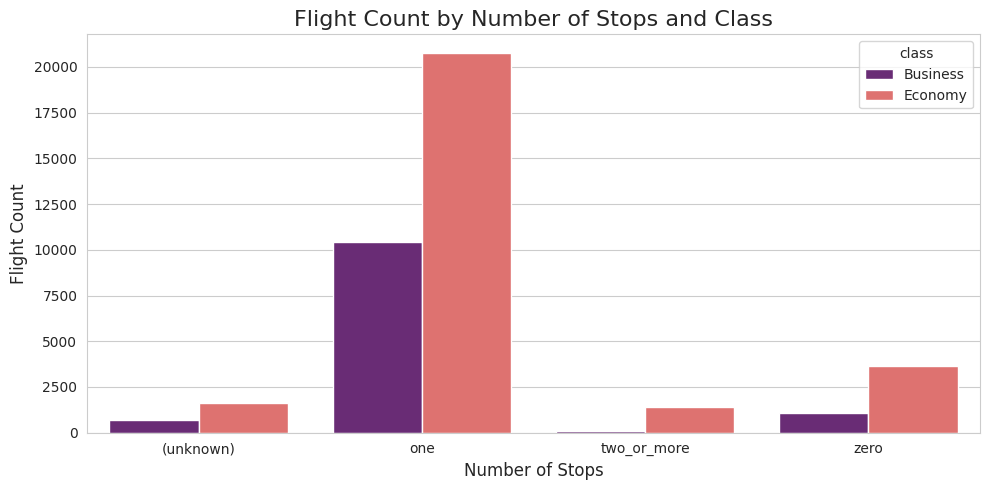

In [24]:
plt.figure(figsize=(10, 5))
stop_order = sorted(train_copy['stops'].unique().tolist())
sns.countplot(data=train_copy, x="stops", hue="class", order=stop_order, palette='magma')
plt.title("Flight Count by Number of Stops and Class", fontsize=16)
plt.xlabel("Number of Stops", fontsize=12)
plt.ylabel("Flight Count", fontsize=12)
plt.tight_layout()
plt.show()

##  4. Average Flight Prices vs Days Left

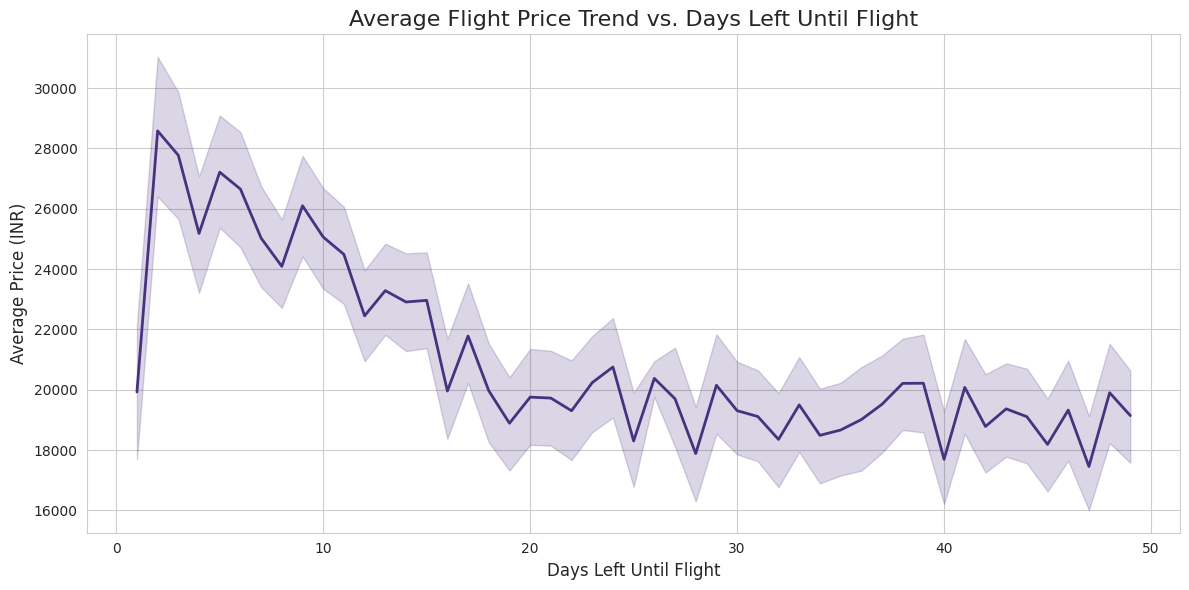

In [25]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=train_copy, x="days_left", y="price", estimator=np.mean, errorbar=('ci', 95), linewidth=2)
plt.title("Average Flight Price Trend vs. Days Left Until Flight", fontsize=16)
plt.xlabel("Days Left Until Flight", fontsize=12)
plt.ylabel("Average Price (INR)", fontsize=12)
plt.tight_layout()
plt.show()

## 5. Average Price by Source City

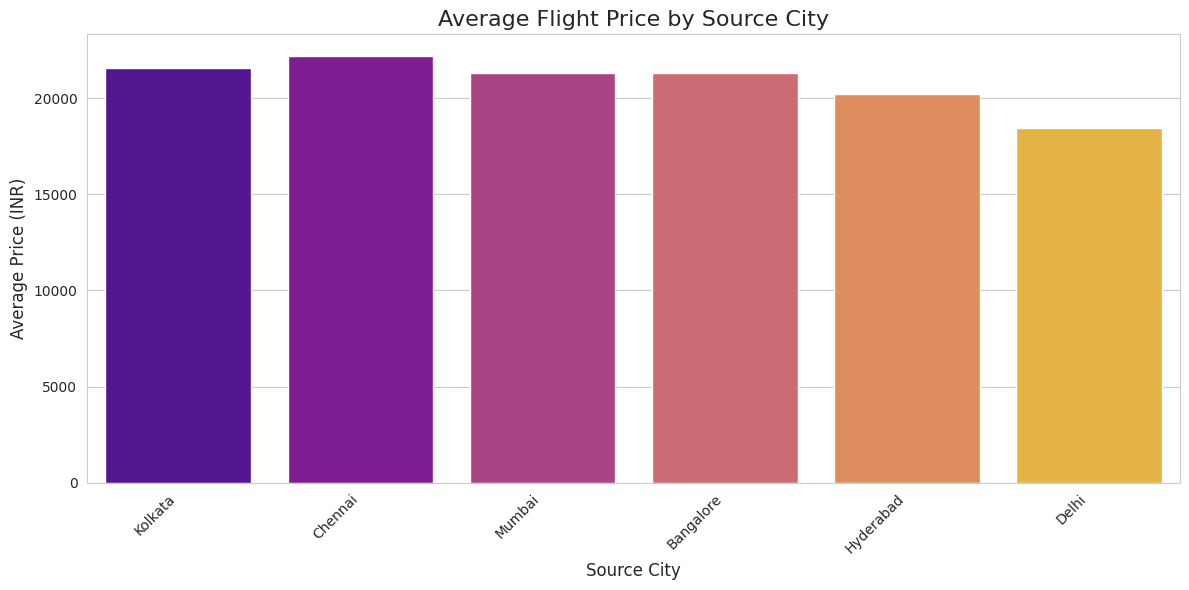

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(data=train_copy.sort_values(by='price', ascending=False), x="source", y="price", estimator=np.mean, errorbar=None, palette='plasma')
plt.title("Average Flight Price by Source City", fontsize=16)
plt.ylabel("Average Price (INR)", fontsize=12)
plt.xlabel("Source City", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 6. Arrival Time Block vs Average Price

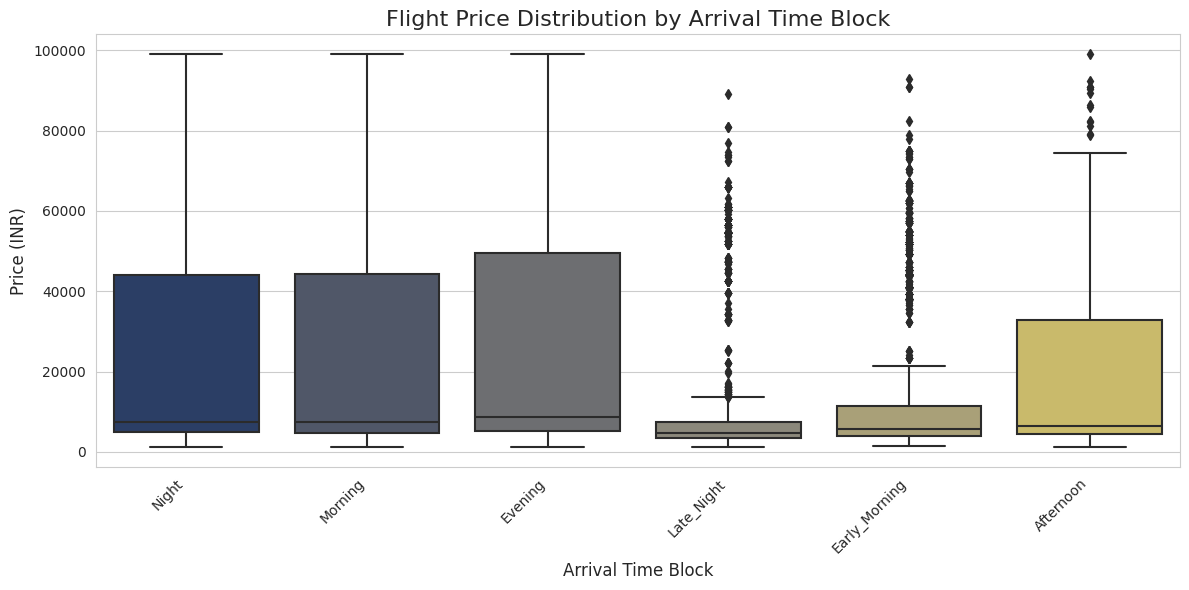

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_copy, x="arrival", y="price", palette='cividis')
plt.title("Flight Price Distribution by Arrival Time Block", fontsize=16)
plt.ylabel("Price (INR)", fontsize=12)
plt.xlabel("Arrival Time Block", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

I created six visualizations to explore trends and patterns. These included average price by airline, price vs. duration colored by class, and flight count by number of stops. I also analyzed how price varies with days left before departure, price distribution by source city, and price trends by arrival time. These visualizations helped me understand how features relate to the target variable. These helped guide feature importance and model interpretation.

Here are my key visualizations and insights:

1. **Average Flight Price by Airline**: A bar plot showing higher average fares for certain airlines, likely due to premium offerings.
2. **Price vs. Duration Colored by Class**: A scatter plot clearly indicating Business class flights are significantly pricier than Economy, irrespective of duration.
3. **Flight Count by Stops and Class**: A count plot revealing most Economy flights are non-stop or one-stop, while Business class has a more varied stop distribution.
4. **Average Flight Prices vs. Days Left**: A line plot showing prices generally increase as the departure date approaches, reflecting last-minute booking premiums.
5. **Average Price by Source City**: A bar plot indicating higher average fares from major hubs, possibly due to more business routes or higher demand.
6. **Arrival Time Block vs. Average Price**: A box plot suggesting higher prices for evening and night arrivals, likely due to demand for convenient timings.

# 7. Scale Numerical features and Encode Categorical features (10)
Explanation for scaling (or not scaling) and encoding (or not encoding) is provided

In [28]:
num_cols = ['duration', 'days_left']
high_cat_cols = []
low_cat_cols = [] 
for i in train_copy.columns:
    if train_copy[i].dtype == 'object':
        if train_copy[i].nunique() > 15:
            high_cat_cols.append(i)
        else:
            low_cat_cols.append(i)
print(f"Numerical columns: {num_cols}")
print(f"High-cardinality categorical: {high_cat_cols}")
print(f"Low-cardinality categorical: {low_cat_cols}")

Numerical columns: ['duration', 'days_left']
High-cardinality categorical: ['flight']
Low-cardinality categorical: ['airline', 'source', 'departure', 'stops', 'arrival', 'destination', 'class']


In [29]:
train_x, valid_x, train_y, valid_y = train_test_split(
    train_copy.drop(columns=['price']),train_copy['price'],test_size=0.2,random_state=42)

In [30]:
target_encoder = TargetEncoder()
target_encoder.fit(train_x[high_cat_cols], train_y)
preprocessor = ColumnTransformer(transformers=[
    ('ss', StandardScaler(), num_cols),
    ('ohe', OneHotEncoder(handle_unknown='ignore'), low_cat_cols)
], remainder='passthrough')
for var in ('train_x', 'valid_x', 'test_copy'):
    i = globals()[var]
    encoded_cols = target_encoder.transform(i[high_cat_cols])
    i.drop(columns=high_cat_cols, inplace=True)
    i = i.join(encoded_cols)
    trans = preprocessor.fit_transform(i).toarray()
    feature_names = preprocessor.get_feature_names_out()
    i = pd.DataFrame(trans, columns=feature_names)
    globals()[var] = i

I separated the features into numerical, low-cardinality, and high-cardinality categorical groups. I applied StandardScaler to numerical columns and OneHotEncoding to low-cardinality features. For high-cardinality features like flight numbers, I used Target Encoding since it preserves target-related information effectively. I combined these transformations using a `ColumnTransformer` to keep my preprocessing clean and modular. This step ensured that all models received appropriately scaled and encoded inputs, which helped improve accuracy and training speed.


# 8. Model Building (at least 7) (20)
7 different types of models are trained on the data

In [31]:
model_metric = {}
fitted_model = {}

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(random_state=42),
    "Lasso Regression": Lasso(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, n_jobs=-1),
    "LightGBM": LGBMRegressor(random_state=42, n_jobs=-1, verbosity=-1),
    "KNN": KNeighborsRegressor()
}

In [32]:
for model_name, model in models.items():
    print(f"---Training {model_name}---")
    model.fit(train_x, train_y)
    fitted_model[model_name] = model
    valid_pred = model.predict(valid_x)
    rmse = np.sqrt(mean_squared_error(valid_y, valid_pred))
    r2 = r2_score(valid_y, valid_pred)
    model_metric[model_name] = {"R2": r2, "RMSE": rmse}
    print(f"RMSE: {rmse:.2f} | R2: {r2:.4f}")

---Training Linear Regression---
RMSE: 6780.23 | R2: 0.9118
---Training Ridge Regression---
RMSE: 6780.27 | R2: 0.9118
---Training Lasso Regression---
RMSE: 6780.44 | R2: 0.9118
---Training Decision Tree---
RMSE: 4683.50 | R2: 0.9579
---Training Random Forest---
RMSE: 3393.65 | R2: 0.9779
---Training Gradient Boosting---
RMSE: 4489.72 | R2: 0.9613
---Training XGBoost---
RMSE: 3638.48 | R2: 0.9746
---Training LightGBM---
RMSE: 3789.08 | R2: 0.9725
---Training KNN---
RMSE: 8868.56 | R2: 0.8492


I built nine regression models: Linear Regression, Ridge, Lasso, Decision Tree, Random Forest, Gradient Boosting, XGBoost, LightGBM, and KNN. I trained each one using the processed training set and evaluated them on a validation split. I recorded RMSE and R² scores for each model in a dictionary for easy comparison. This approach allowed me to test a wide range of algorithms and observe how they performed. It also made it easier to pick the best model later for tuning and final predictions.



# 9. Hyperparameter Tuning on any 3 of the models (10)
Hyperparameter tuning is done on 3 of the models

In [33]:
params = {
    "Random Forest": {
        'n_estimators': [50, 100],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5]
    },
    "XGBoost": {
        'n_estimators': [50, 100],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    },
    "LightGBM": {
        'n_estimators': [50, 100],
        'learning_rate': [0.05, 0.1],
        'num_leaves': [20, 31]
    }
}

In [34]:
for model_name, param in params.items():
    print(f"---Tuning {model_name}---")
    model = models[model_name]
    grid_search = GridSearchCV(model, param, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=0)
    grid_search.fit(train_x, train_y)
    tuned_model = grid_search.best_estimator_
    fitted_model[model_name] = tuned_model
    valid_pred = tuned_model.predict(valid_x)
    rmse = np.sqrt(mean_squared_error(valid_y, valid_pred))
    r2 = r2_score(valid_y, valid_pred)
    model_metric[model_name] = {"R2": r2, "RMSE": rmse}
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Tuned RMSE: {rmse:.2f} | R2: {r2:.4f}\n")

---Tuning Random Forest---
Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Tuned RMSE: 3382.57 | R2: 0.9781

---Tuning XGBoost---
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Tuned RMSE: 4010.73 | R2: 0.9692

---Tuning LightGBM---
Best parameters: {'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 31}
Tuned RMSE: 3789.08 | R2: 0.9725



I applied hyperparameter tuning using GridSearchCV on Random Forest, XGBoost, and LightGBM. I experimented with different values for `n_estimators`, `learning_rate`, `max_depth`, and more. I used 3-fold cross-validation and selected the best-performing parameters based on negative RMSE. Once tuned, I retrained each model and evaluated them again. This tuning step helped improve model performance by fine-tuning them for the dataset’s characteristics, making my predictions more reliable.

# 10. Comparison of model performances (10)
Performance of the models on validation set is compared

In [35]:
performance_df = pd.DataFrame(model_metric).T.sort_values(by='RMSE')
print("Model Performance Comparison (sorted by RMSE):")
display(performance_df)
best_model_name = performance_df.index[0]
best_model = fitted_model[best_model_name]
print(f"\nBest performing model: {best_model_name}")
print(f"Best RMSE: {performance_df.iloc[0]['RMSE']:.4f}")
print(f"Best R²: {performance_df.iloc[0]['R2']:.4f}")

Model Performance Comparison (sorted by RMSE):


,R2,RMSE
Random Forest,0.978058,3382.574388
LightGBM,0.972467,3789.080830
XGBoost,0.969152,4010.734224
Gradient Boosting,0.961344,4489.721085
Decision Tree,0.957935,4683.496949
Linear Regression,0.911840,6780.229190
Ridge Regression,0.911839,6780.265468
Lasso Regression,0.911835,6780.440444
KNN,0.849170,8868.563973



Best performing model: Random Forest
Best RMSE: 3382.5744
Best R²: 0.9781


After training and tuning the models, I created a performance DataFrame to compare RMSE and R² across all models. I sorted the results to identify the best model, which I then retrained on the entire dataset. 

In [36]:
full_x = pd.concat([train_x, valid_x], axis=0)
full_y = pd.concat([train_y, valid_y], axis=0)
best_model.fit(full_x, full_y)
test_pred = best_model.predict(test_copy)
test_pred = np.clip(test_pred, 0, None)

submission = pd.DataFrame({
    "id": test_copy.index,
    "price": test_pred
})
submission.to_csv("submission.csv", index=False)